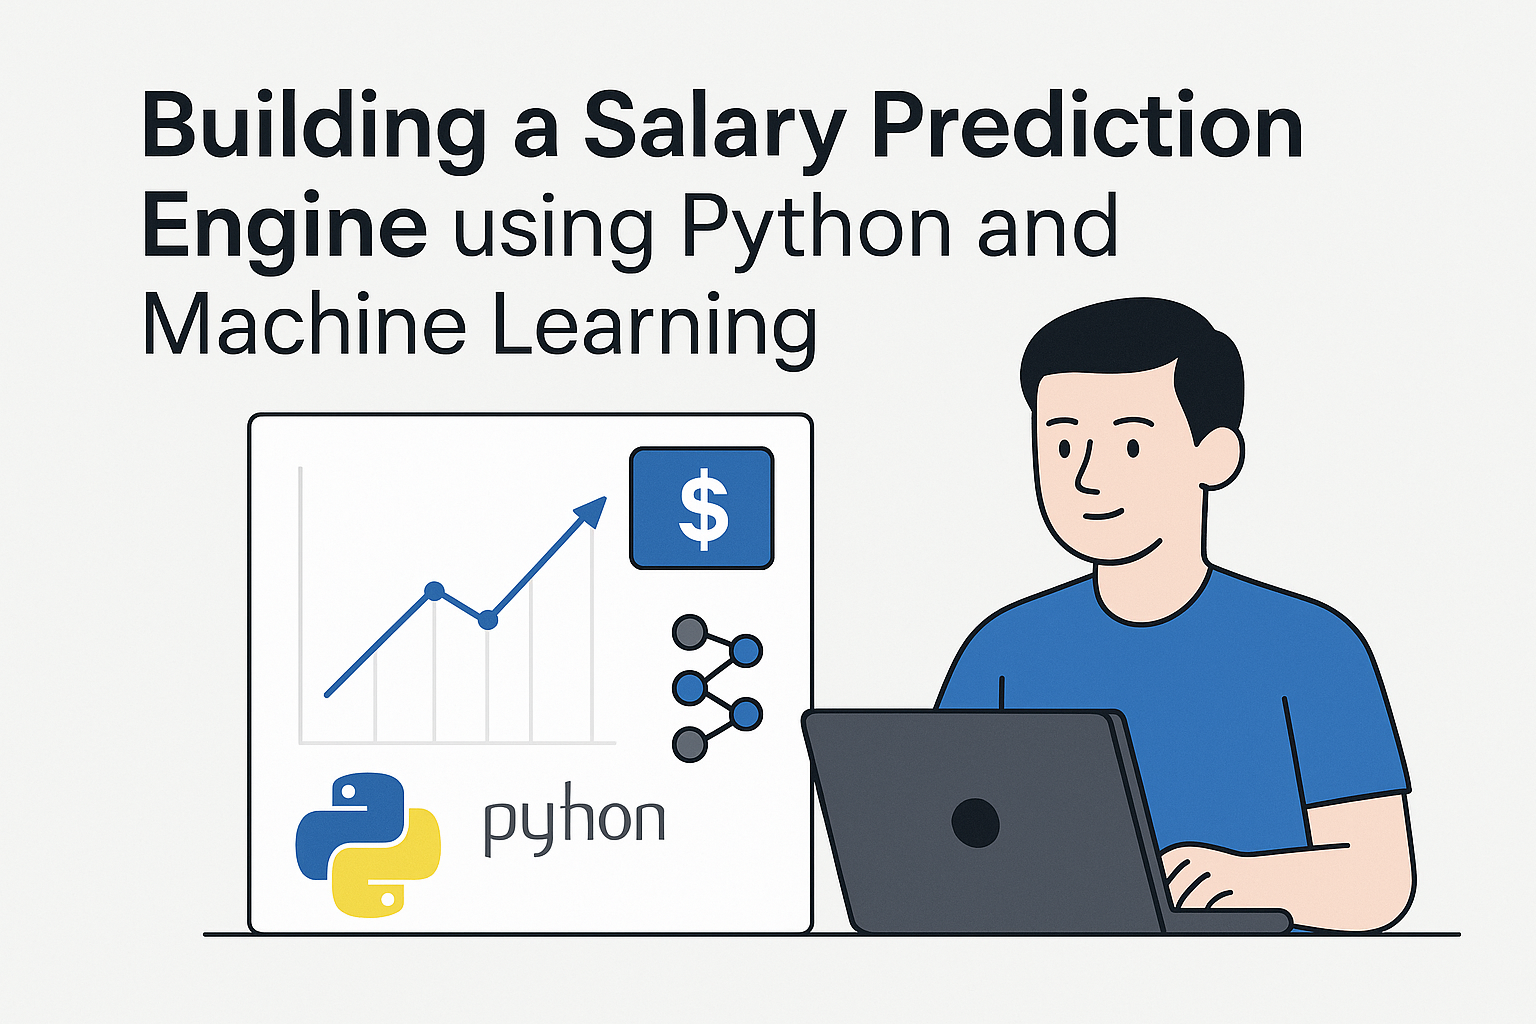

# Libraries and Modules required : ---

In [ ]:
# Libraries for Data Manipulation
import pandas as pd
import numpy as np

# Libraries for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring in-built warning
import warnings
warnings.filterwarnings('ignore')

# Libraries for Pre-Processing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Libraries of data treatment before model building
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Libaries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Saving and Loading files
import pickle

# Loading Dataset : ---

In [ ]:
data = pd.read_csv('adult 3.csv')

In [ ]:
data.sample(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
28222,58,Self-emp-inc,78104,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
42997,43,Private,125461,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,1902,55,United-States,>50K
11741,50,Federal-gov,193116,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26499,52,Self-emp-not-inc,135339,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
8545,50,Local-gov,151143,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
36464,25,Local-gov,63996,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13015,18,Private,65098,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,30,United-States,<=50K


# Basic EDA Check : ---

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


# Duplicated Values

In [ ]:
data.duplicated().sum()

np.int64(52)

In [ ]:
# Removing Duplicated rows

data.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Let's Check the Value Counts of all columns

In [ ]:
# As we can see some '?' values in various columns let's treat them

categorical_columns = data.select_dtypes(include=object)

for i in categorical_columns:
  print(f"\n**Column name - {i}**")
  print(data[i].value_counts())


**Column name - workclass**
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

**Column name - education**
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

**Column name - marital-status**
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype

# Replacing the Irrelevant Values

In [ ]:
# workclass, occupation and native-country columns have the '?' missing values and let's replace it

data['workclass'] = data['workclass'].replace('?','Not-Specified')
data['occupation'] = data['occupation'].replace('?','Not-Defined')
data['native-country'] = data['native-country'].replace('?','Others')

# Creating a copy of Dataset

In [ ]:
data1 = data.copy()
data1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Not-Specified,103497,Some-college,10,Never-married,Not-Defined,Own-child,White,Female,0,0,30,United-States,<=50K


# Feature Selection

In [ ]:
# this feature selection is by considering the real life parameters that affect the salary of an individual

df = data1[['age','workclass','education','occupation','hours-per-week','native-country','income']]
df.head()

,age,workclass,education,occupation,hours-per-week,native-country,income
0,25,Private,11th,Machine-op-inspct,40,United-States,<=50K
1,38,Private,HS-grad,Farming-fishing,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Protective-serv,40,United-States,>50K
3,44,Private,Some-college,Machine-op-inspct,40,United-States,>50K
4,18,Not-Specified,Some-college,Not-Defined,30,United-States,<=50K


# Outlier Analysis of the columns

**age column**

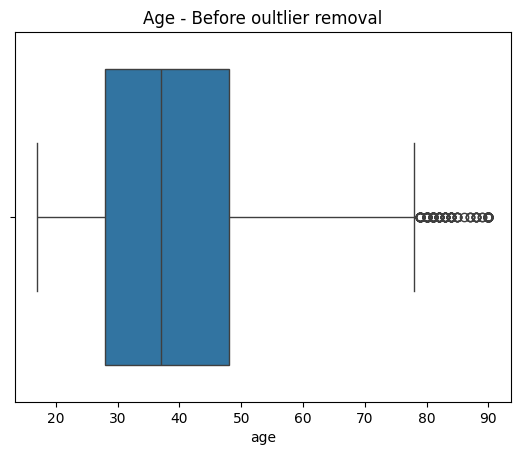

In [ ]:
# Let's see age column first

sns.boxplot(data=df,x='age')
plt.title("Age - Before oultlier removal")
plt.show()

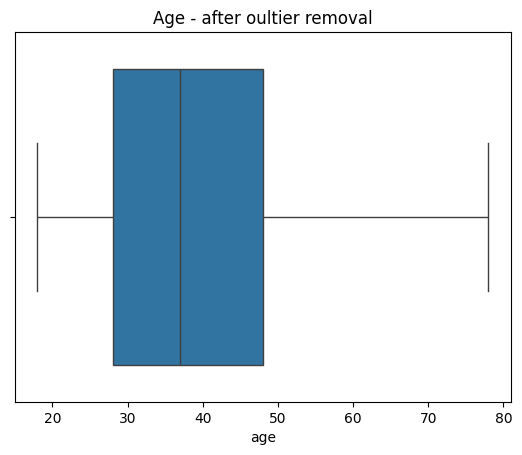

In [ ]:
# as the age column consist outlier new range is 18 to 78

df = df[(df['age']>17)&(df['age']<79)]

# let's visualize now
sns.boxplot(data=df, x='age')
plt.title("Age - after oultier removal")
plt.show()

**education column**

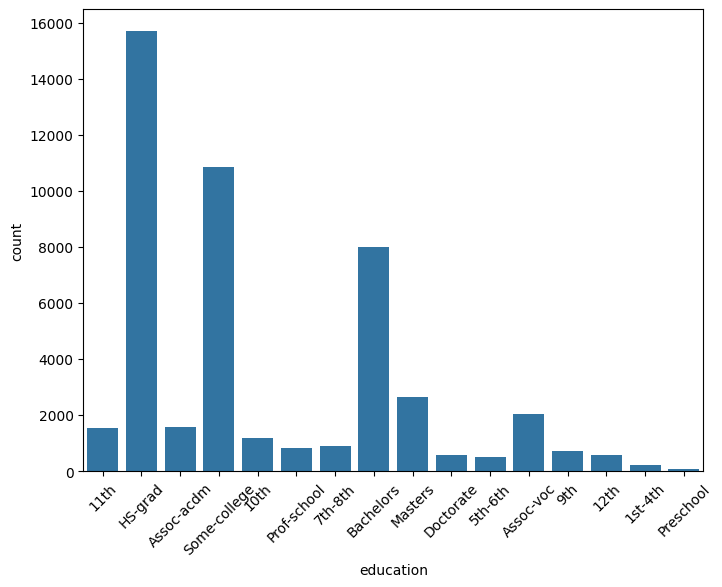

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='education')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# as some values from education column is irrelevant and share very less proportions
# therefore removing them
df = df[~df['education'].isin(['Preschool','1st-4th','7th-8th','5th-6th'])]
df['education'].value_counts()

,count
education,
HS-grad,15701
Some-college,10848
Bachelors,8000
Masters,2644
Assoc-voc,2055
Assoc-acdm,1596
11th,1539
10th,1183
Prof-school,823


**occupation**

In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6111
Exec-managerial,6012
Craft-repair,5811
Adm-clerical,5519
Sales,5280
Other-service,4404
Machine-op-inspct,2744
Not-Defined,2494
Transport-moving,2207


**hours-per-week**

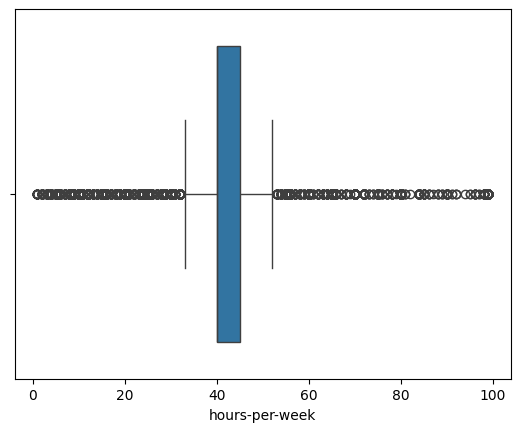

In [ ]:
sns.boxplot(data=df, x='hours-per-week')
plt.show()

# Splitting into Features and Target

In [ ]:
x = df.drop('income',axis=1)
y = df.income

print(f"Shape of features(x) : {x.shape}")
print(f"Shape of target(y) : {y.shape}")

Shape of features(x) : (46285, 6)
Shape of target(y) : (46285,)


# Label Encoding

In [ ]:
le = LabelEncoder()

# categorical and numerical columns
categorical_df = x.select_dtypes(include = object)
numerical_df = x.select_dtypes(include = int)

# encoding of categorical_columns using loop
for i in categorical_df:
  x[i] = le.fit_transform(df[i])
  print(le.classes_)

['Federal-gov' 'Local-gov' 'Never-worked' 'Not-Specified' 'Private'
 'Self-emp-inc' 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '9th' 'Assoc-acdm' 'Assoc-voc' 'Bachelors'
 'Doctorate' 'HS-grad' 'Masters' 'Prof-school' 'Some-college']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Not-Defined'
 'Other-service' 'Priv-house-serv' 'Prof-specialty' 'Protective-serv'
 'Sales' 'Tech-support' 'Transport-moving']
['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua' 'Others'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia']


# Splitting into Training and Testing set

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

# shape
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_train : (37028, 6)
Shape of y_train : (37028,)
Shape of x_test : (9257, 6)
Shape of y_test : (9257,)


# Trail - Model Building and Evaluation

Accuracy of LogisticRegression model : 0.7456

Confusion matrix for Logistic Regression Model



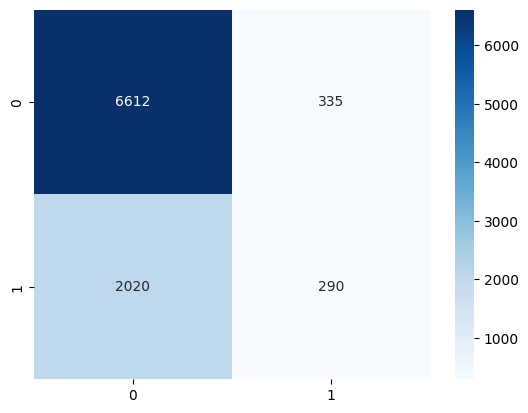

In [ ]:
# using Logistic Regression
LR = LogisticRegression()

# Fitting the model into training data
model = LR.fit(x_train,y_train)

# predicting the labels using testing data
y_pred = model.predict(x_test)


# model evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of LogisticRegression model : {accuracy:.4f}\n")

# Confusion Matrix
print("Confusion matrix for Logistic Regression Model\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, cmap='Blues', annot=True, fmt='2g')
plt.show()

# Trying Multimodels to Find best Fit Model

In [ ]:
# Models : ---

models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'SVM' : SVC(),
    'KNN' : KNeighborsClassifier()
    }

results = {}

# training and evalution of models
for name,model in models.items():
    test_model = model.fit(x_train,y_train)
    pred = test_model.predict(x_test)
    acc_score = accuracy_score(y_test, pred)
    results[name] = acc_score
    print(f"{name} Model : {acc_score:.2f}\n")

# finding best model among all
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best model -->> {best_model_name} with accuracy of {results[best_model_name]:.2f}")

# Saving the best model
with open('best_model.pkl','wb') as file:
    pickle.dump(best_model,file)
print("\nModel saved Successfully , saved file name : best_model.pkl")

Logistic Regression Model : 0.75

Decision Tree Model : 0.74

Random Forest Model : 0.77

Gradient Boosting Model : 0.80

SVM Model : 0.75

KNN Model : 0.75

Best model -->> Gradient Boosting with accuracy of 0.80

Model saved Successfully , saved file name : best_model.pkl


# Let's Visualize the Accuracy of all models

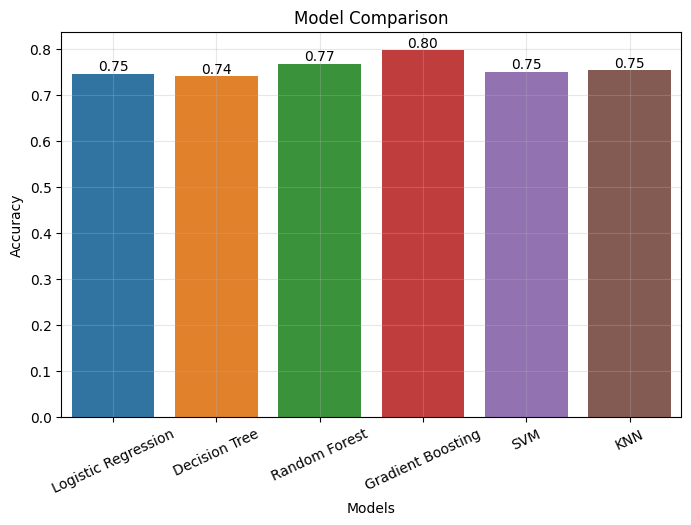

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data = results, x = results.keys(),y= results.values(),hue=results.keys())
for i in ax.containers:
  plt.bar_label(i,fmt='%.2f')
plt.xticks(rotation = 25)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.grid(alpha=0.30)
plt.show()

# App Interface for Model Deployment

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# loading saved model
with open('best_model.pkl','rb') as file:
 loaded_model = pickle.load(file)

st.set_page_config(page_title="Employee Salary Classification", page_icon = "🤑", layout = 'centered')

st.title("🤑 EMPLOYEES SALARY PREDICTION APP")
st.markdown("Develop a predictive model to classify whether an employee’s salary exceeds $50,000 or not based on their input features.")

# sidebar inputs
st.sidebar.header("ENTER EMPLOYEE DETAILS")


age = st.sidebar.slider("AGE", 18,78,30)
workclass = st.sidebar.selectbox("WORKCLASS",['Federal-gov', 'Local-gov', 'Never-worked',
            'Not-Specified', 'Private','Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
            'Without-pay'])
education = st.sidebar.selectbox("EDUCATION LEVEL", ['10th', '11th', '12th', '9th',
            'Assoc-acdm', 'Assoc-voc', 'Bachelors','Doctorate', 'HS-grad', 'Masters',
            'Prof-school', 'Some-college'])
occupation = st.sidebar.selectbox("JOB ROLE", ['Adm-clerical','Armed-Forces',
            'Craft-repair', 'Exec-managerial','Farming-fishing', 'Handlers-cleaners',
            'Machine-op-inspct', 'Not-Defined', 'Other-service', 'Priv-house-serv',
            'Prof-specialty', 'Protective-serv','Sales', 'Tech-support', 'Transport-moving'
            ])
hours_per_week = st.sidebar.slider("HOURS-PER-WEEK", 1,80,45)
native_country = st.sidebar.selectbox("NATIVE COUNTRY", ['Cambodia', 'Canada', 'China',
                 'Columbia', 'Cuba', 'Dominican-Republic',
                 'Ecuador', 'El-Salvador', 'England', 'France','Germany','Greece','Guatemala'
                 'Haiti','Holand-Netherlands','Honduras','Hong','Hungary','India','Iran',
                 'Ireland','Italy','Jamaica','Japan','Laos','Mexico','Nicaragua','Others',
                 'Outlying-US(Guam-USVI-etc)','Peru','Philippines','Poland','Portugal',
                 'Puerto-Rico','Scotland','South','Taiwan','Thailand','Trinadad&Tobago',
                 'United-States','Vietnam','Yugoslavia'])


# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'workclass' : [workclass],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'native-country' : [native_country]
})

st.write("### 🔎 INPUT DATA")
st.write(input_df)

# Predict button
if st.button("PREDICT SALARY CLASS"):
  for i in input_df.columns:
    if input_df[i].dtypes==object:
      input_df[i] = le.fit_transform(input_df[i])
  prediction = loaded_model.predict(input_df)
  st.success(f"✅ PREDICTION : {prediction}")

# Batch prediction
st.markdown("---")
st.markdown("## 📁 BATCH PREDICTION")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
  batch_data = pd.read_csv(uploaded_file)
  st.write("Upload data preview :", batch_data.head())
  batch_pred = loaded_model.predict(batch_data)
  batch_data['Predicted Classes'] = batch_pred
  st.write("✅ Predictions:")
  st.write(batch_data.head())
  csv = batch_data.to_csv(index=False).encode('utf-8')
  st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py


# Using Python Wrapper and Auth Tokens by ngrok

In [ ]:
! pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 490.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
! ngrok authtoken 2y3JiQbQ6peTqC6nsSTsFox8AS5_6St8TfKuJQTfi9JUQLRJi

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# Deployment of Model using Streamlit

In [ ]:
import os
import threading

def run_streamlit():
  os.system("streamlit run app.py -- server.port 8501")

thread = threading.Thread(target = run_streamlit)
thread.start()

# App Run

In [ ]:
from pyngrok import ngrok
import time

# wait for few seconds to make streamlit run
time.sleep(3)

# create a tunnel to streamlit port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit App Server is Live;", public_url)

Your Streamlit App Server is Live; NgrokTunnel: "https://6c822adc1328.ngrok-free.app" -> "http://localhost:8501"


In [46]:
# to kill the running services.

# ngrok.kill()